# Album Investigations

In [3]:
album_name = "to pimp a butterfly".lower()
album_frame = scrobbles[scrobbles["album"].str.lower() == album_name]# FILTER SCROBBLES
album_frame = album_frame.sort_index(ascending=False) # SORT
# album_frame = album_frame.loc[:, descriptor_headers] # DESCRIPTORS

total_time = album_frame["duration_ms"].sum() / (1000 * 60) # minutes
total_days = total_time / (60 * 24) # days
print(f'{album_frame.count()[0]:,d} scrobbles')
print(f'{total_days:.0f} days spent listening since Nov. 2017')
print(f'{total_time / days_since(first_day).days:.2f} minutes/day')

album_frame.describe()[1:]

342 scrobbles
1 days spent listening since Nov. 2017
1.37 minutes/day


,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
mean,0.241967,0.614392,278004.622807,0.700585,0.000010,4.336257,0.254358,-5.601778,0.611111,0.262247,109.402096,3.918129,0.451237
std,0.190477,0.136551,79915.404232,0.111292,0.000028,3.598766,0.185445,1.278614,0.488212,0.135878,28.739742,0.705462,0.151781
min,0.005890,0.301000,130893.000000,0.489000,0.000000,1.000000,0.082700,-9.043000,0.000000,0.063800,79.036000,1.000000,0.270000
25%,0.110000,0.539000,254200.000000,0.635000,0.000000,1.000000,0.129000,-6.562000,0.000000,0.152000,87.948000,4.000000,0.334000
50%,0.145000,0.615000,271773.000000,0.729000,0.000000,3.000000,0.202000,-5.233000,1.000000,0.238000,108.005000,4.000000,0.373000
75%,0.415000,0.752000,291720.000000,0.766000,0.000004,7.000000,0.285000,-4.708000,1.000000,0.325000,111.914000,4.000000,0.558000
max,0.665000,0.884000,727107.000000,0.896000,0.000115,11.000000,0.708000,-4.080000,1.000000,0.750000,176.058000,5.000000,0.897000


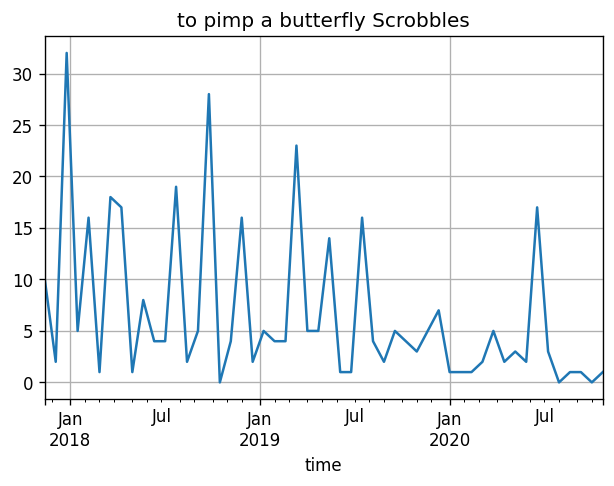

In [4]:
filtered_album = scrobbles[scrobbles["album"].str.lower() == album_name]
# resample by day and mean
filtered_album = filtered_album.resample("3W").count()

filtered_album["energy"].plot()

plt.title(f"{album_name} Scrobbles")
plt.grid()
plt.show()

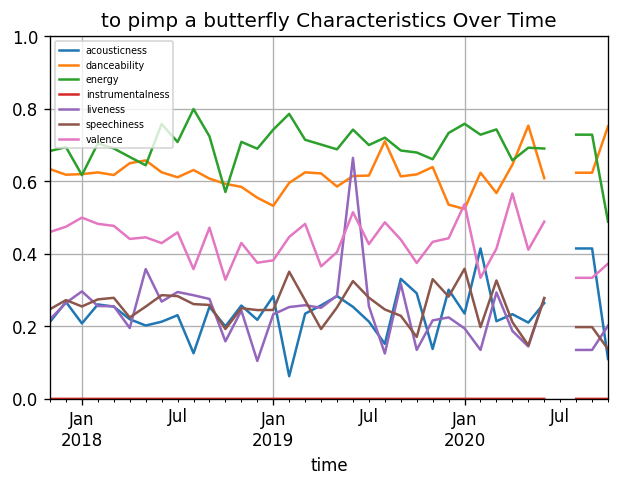

In [5]:
filtered_album = scrobbles[scrobbles["album"].str.lower() == album_name]
# select only descriptor float columns
filtered_album = filtered_album.loc[:, float_headers]
# resample by day and mean
filtered_album = filtered_album.resample("1M").mean()

# filtered_album["energy"].plot()
filtered_album.plot()

plt.title(f"{album_name} Characteristics Over Time")
plt.legend(loc = "upper left", fontsize = "xx-small")
plt.ylim([0, 1])
plt.grid()
plt.show()

# Album Listening Time

In [25]:
limit = 50
albums = fmnet.top_albums(period=fmnet.Range.OVERALL, limit=limit)

filtered_albums = [scrobbles[scrobbles["album"] == i.name] for i in albums]

### STATS ###
# total time listening to artists 
albums_time = [i["duration_ms"].sum() for i in filtered_albums]
# total number of tracks
albums_track_count = np.array([i.drop_duplicates(["uri"]).count()[0] for i in filtered_albums])
# average length of artist's tracks (ms)
albums_average_track_length = np.array([i.drop_duplicates(["uri"])["duration_ms"].mean() for i in filtered_albums])

fig_size = (7,(5/20)*limit)

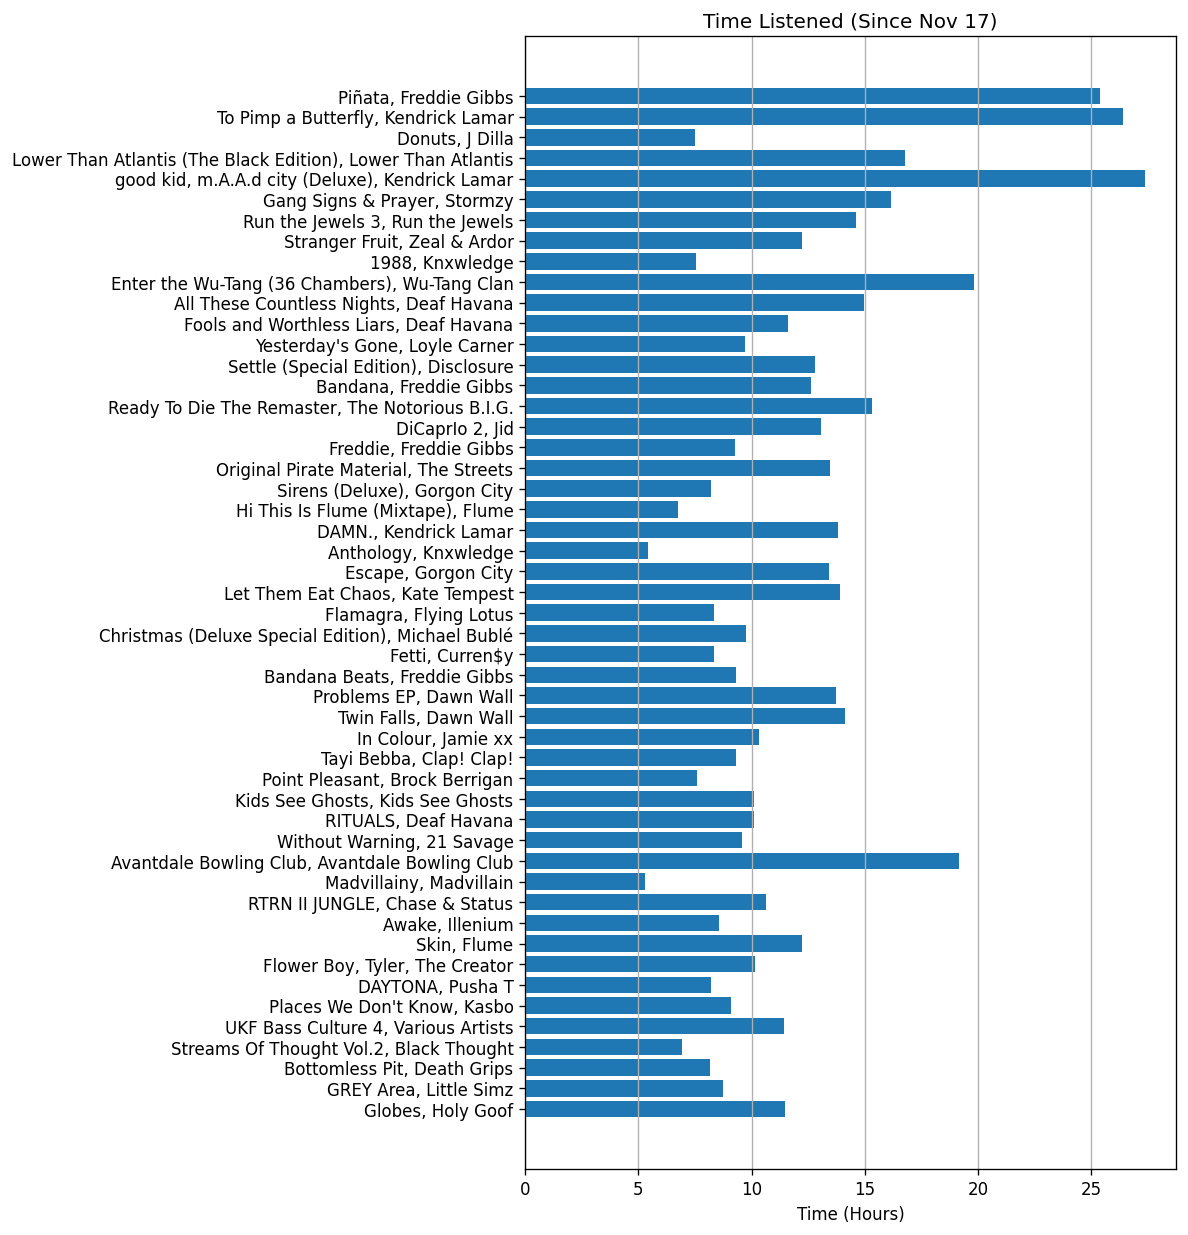

In [26]:
plt.figure(figsize=fig_size)
plt.barh(np.arange(len(albums))[::-1], np.array(albums_time) / (1000 * 60 * 60) )
plt.yticks(np.arange(len(albums))[::-1], labels=[f'{i.name}, {i.artist["name"]}' for i in albums])
plt.xlabel("Time (Hours)")
plt.grid(axis="x")
plt.title("Time Listened (Since Nov 17)")
plt.show()

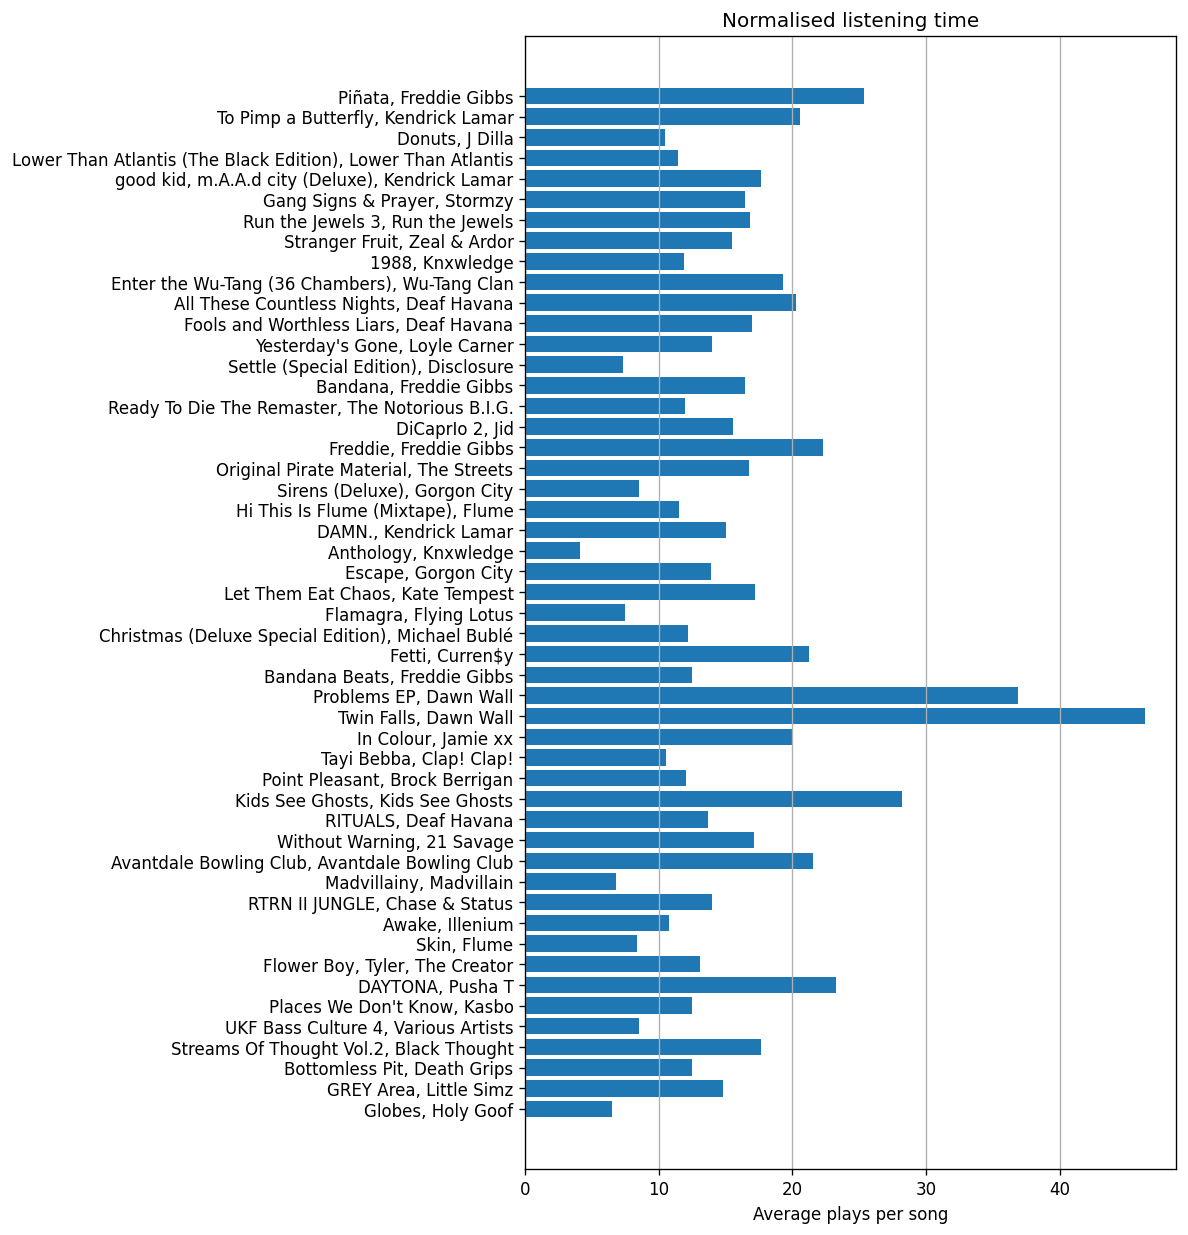

In [27]:
plt.figure(figsize=fig_size)
plt.barh(np.arange(len(albums))[::-1], np.array(albums_time) / (albums_track_count * albums_average_track_length) )
plt.yticks(np.arange(len(albums))[::-1], labels=[f'{i.name}, {i.artist["name"]}' for i in albums])
plt.xlabel("Average plays per song")
plt.grid(axis="x")
plt.title("Normalised listening time")
plt.show()

# Imports & Setup

In [1]:
from datetime import datetime

from google.cloud import bigquery
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 120

from analysis.net import get_spotnet, get_fmnet, get_playlist, track_frame
from analysis.query import *
from analysis import float_headers, days_since

import pandas as pd
import numpy as np

client = bigquery.Client()
spotnet = get_spotnet()
fmnet = get_fmnet()
cache = 'query.csv'
first_day = datetime(year=2017, month=11, day=3)

## Read Scrobble Frame

In [2]:
scrobbles = get_query(cache=cache)

## Write Scrobble Frame

In [ ]:
scrobbles.reset_index().to_csv(cache, sep='\t')